# Описание проекта
Мы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
Тариф «Смарт»

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
    * Сообщение — 3 рубля.
    * 1 Гб интернет-трафика — 200 рублей.

Тариф «Ультра»

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * Минута разговора — 1 рубль;
    * Сообщение — 1 рубль;
    * 1 Гб интернет-трафика: 150 рублей.

### Описание данных
Таблица users — информация о пользователях:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

Таблица calls — информация о звонках:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages — информация о сообщениях:

* id — уникальный номер звонка
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet — информация об интернет-сессиях:

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs — информация о тарифах:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Просмотр данных

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# загрузим файлы в проект
# откроем файл calls.csv, сохраним датафрейм в переменную calls.
calls = pd.read_csv('calls.csv')

# откроем файл internet.csv, сохраним датафрейм в переменную sessions.
sessions = pd.read_csv('internet.csv')

# откроем файл messages.csv, сохраним датафрейм в переменную messages.
messages = pd.read_csv('messages.csv')

# откроем файл tariffs.csv, сохраним датафрейм в переменную tariffs.
tariffs = pd.read_csv('tariffs.csv')

# откроем файл users.csv, сохраним датафрейм в переменную users.
users = pd.read_csv('users.csv')

In [3]:
# выведем первые 5 строк датафрейма calls.
calls.head()

id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

In [4]:
# выведем основную информацию для датафрейма calls с помощью метода info().
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<Axes: >

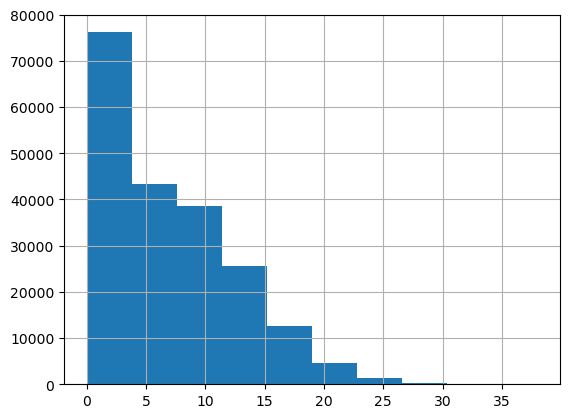

In [5]:
# с помощью метода hist() выведем гистограмму для столбца с продолжительностью звонков.
calls['duration'].hist()



In [6]:
# Посмотрим на распределение продолжительности звонка.
display(calls['duration'].value_counts())
print()
# рассмотрим внимательнее.
display(calls['duration'].value_counts(bins=10))

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

(-0.039, 3.8]    76313
(3.8, 7.6]       43348
(7.6, 11.4]      38426
(11.4, 15.2]     25557
(15.2, 19.0]     12649
(19.0, 22.8]      4686
(22.8, 26.6]      1307
(26.6, 30.4]       261
(30.4, 34.2]        50
(34.2, 38.0]        10
Name: duration, dtype: int64

In [7]:
# выведем первые 5 строк датафрейма sessions.
sessions.head()

Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000

In [8]:
# выведем основную информацию для датафрейма sessions с помощью метода info().
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


<Axes: >

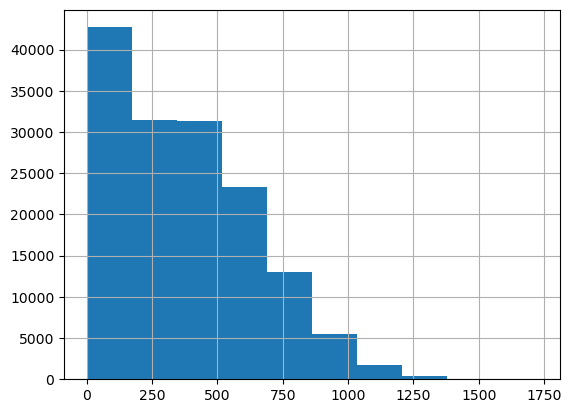

In [9]:
# с помощью метода hist() выведем гистограмму для столбца с количеством потраченных мегабайт.
sessions['mb_used'].hist()

In [10]:
# рассмотрим распределение количества потраченных мегобайт.
display(sessions['mb_used'].value_counts())
print()
# разобъем количество потраченных мегобайт и рассмотрим на интервалах.
display(sessions['mb_used'].value_counts(bins=20))

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

(-1.726, 86.242]        29886
(258.725, 344.966]      16448
(344.966, 431.208]      16167
(431.208, 517.449]      15106
(172.483, 258.725]      14952
(517.449, 603.69]       13044
(86.242, 172.483]       12814
(603.69, 689.932]       10247
(689.932, 776.174]       7686
(776.174, 862.415]       5375
(862.415, 948.656]       3475
(948.656, 1034.898]      2054
(1034.898, 1121.14]      1097
(1121.14, 1207.381]       582
(1207.381, 1293.622]      261
(1293.622, 1379.864]      112
(1379.864, 1466.106]       57
(1466.106, 1552.347]       22
(1552.347, 1638.588]        7
(1638.588, 1724.83]         4
Name: mb_used, dtype: int64

In [11]:
# Выведем первые 5 строк датафрейма messages.
messages.head()

id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000

In [12]:
# Выведем основную информацию для датафрейма messages с помощью метода info().
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
# Выведем весь датафрейм tariffs.
tariffs

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra

In [14]:
# Выведем основную информацию для датафрейма tariffs с помощью метода info().
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
# Выведем первые 5 строк датафрейма users.
users.head()

user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra

In [16]:
# Выведем основную информацию для датафрейма users с помощью метода info().
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Подготовка данных

In [17]:
# Приведем столбцы- reg_date, churn_date- таблицы users;
# call_date из таблицы calls, message_date из таблицы messages; session_date из таблицы sessions
# к новому типу с помощью метода to_datetime().
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')


In [18]:
# в столбце duration датафрейма calls значения дробные. Округлим значения столбца duration вверх с помощью метода numpy.ceil() и приведем столбец duration к типу int.
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [19]:
# Удалим столбец Unnamed: 0 из датафрейма sessions. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (df.to_csv(..., index=column)). Он сейчас не понадобится.
sessions.drop(['Unnamed: 0'], axis=1, inplace=True)

In [20]:
# Создадим столбец month в датафрейме calls с номером месяца из столбца call_date.
calls['month'] = calls['call_date'].dt.month

In [21]:
# Создадим столбец month в датафрейме messages с номером месяца из столбца message_date.
messages['month'] = messages['message_date'].dt.month

In [22]:
# Создадим столбец month в датафрейме sessions с номером месяца из столбца session_date.
sessions['month'] = sessions['session_date'].dt.month

In [23]:
# Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам и сохраним в переменную calls_per_month.
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

# Выведем первые 30 строк на экран
calls_per_month.head(10)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63

In [24]:
# Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраним в переменную minutes_per_month.
# Нам понадобится
# сгруппировать датафрейм с информацией о звонках по двум столбцам — с идентификаторами пользователей и номерами месяцев;
# после группировки выбрать столбец duration
# затем применить метод для подсчёта суммы.
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

# Выведем первые 30 строчек minutes_per_month. 
minutes_per_month.head(30)


minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

In [25]:
# Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраним в переменную messages_per_month.
# Нам понадобится
# сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
# после группировки выбрать столбец message_date;
# затем применить метод для подсчёта количества.
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

# вывод первых 30 строк на экран 
messages_per_month.head(30)


messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

In [26]:
# Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя и сохраним в переменную sessions_per_month.
# Нам понадобится
# сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
# затем применить метод для подсчёта суммы: .agg({'mb_used': 'sum'})
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

# вывод первых 30 строк на экран
sessions_per_month.head(30)


mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

## Анализ данных и подсчёт выручки

In [27]:
# Посмотрим, сколько всего клиентов расторгли договор с оператором.
print(f"Расторгли договор: {users['churn_date'].count() / users['churn_date'].shape[0] * 100}% клиентов из датасета")

Расторгли договор: 7.6% клиентов из датасета


In [28]:
# Объединяем все посчитанные выше значения в один датафрейм user_behavior. Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')

user_behavior.head()


user_id  month  calls  messages   mb_used  minutes  age churn_date  \
0     1000      5   22.0      22.0   2253.49    159.0   52        NaT   
1     1000      6   43.0      60.0  23233.77    172.0   52        NaT   
2     1000      7   47.0      75.0  14003.64    340.0   52        NaT   
3     1000      8   52.0      81.0  14055.93    408.0   52        NaT   
4     1000      9   58.0      57.0  14568.91    466.0   52        NaT   

        city first_name  last_name   reg_date tariff  
0  Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
1  Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
2  Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
3  Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
4  Краснодар     Рафаил  Верещагин 2018-05-25  ultra

In [29]:
# Проверим пропуски в таблице `user_behavior` после объединения:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [30]:
# Заполним образовавшиеся пропуски в данных значением 0.
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [31]:
# проверим результат.
user_behavior.isna().sum()

user_id          0
month            0
calls            0
messages         0
mb_used          0
minutes          0
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [32]:
# переименуем столбец tariff_name на более простое tariff
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

# Присоединяем информацию о тарифах.
user_behavior = user_behavior.merge(tariffs, on='tariff')

# Проверим результат, список столбцов.
list(user_behavior.columns)

['user_id',
 'month',
 'calls',
 'messages',
 'mb_used',
 'minutes',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'reg_date',
 'tariff',
 'messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute']

In [33]:
# Считаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф.
# Для этого создадим дополнительные столбцы.
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0
    
# Проверим результат.
user_behavior.head()

user_id  month  calls  messages   mb_used  minutes  age churn_date  \
0     1000      5   22.0      22.0   2253.49    159.0   52        NaT   
1     1000      6   43.0      60.0  23233.77    172.0   52        NaT   
2     1000      7   47.0      75.0  14003.64    340.0   52        NaT   
3     1000      8   52.0      81.0  14055.93    408.0   52        NaT   
4     1000      9   58.0      57.0  14568.91    466.0   52        NaT   

        city first_name  ... messages_included mb_per_month_included  \
0  Краснодар     Рафаил  ...              1000                 30720   
1  Краснодар     Рафаил  ...              1000                 30720   
2  Краснодар     Рафаил  ...              1000                 30720   
3  Краснодар     Рафаил  ...              1000                 30720   
4  Краснодар     Рафаил  ...              1000                 30720   

  minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
0             3000             1950         150                1   
1             3000             1950         150                1   
2             3000             1950         150                1   
3             3000             1950         150                1   
4             3000             1950         150                1   

   rub_per_minute  paid_minutes  paid_messages  paid_mb  
0               1           0.0            0.0      0.0  
1               1           0.0            0.0      0.0  
2               1           0.0            0.0      0.0  
3               1           0.0            0.0      0.0  
4               1           0.0            0.0      0.0  

[5 rows x 23 columns]

In [34]:
# Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец paid_gb.
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype('int')

# Проверим результат.
user_behavior['paid_gb'].value_counts()

0     1776
2      204
1      186
3      168
4      168
5      150
7      124
6      122
8       81
9       59
10      57
12      31
11      30
13      24
14       8
16       7
15       6
20       3
17       3
19       2
21       2
18       1
22       1
23       1
Name: paid_gb, dtype: int64

In [35]:
# Считаем выручку за минуты разговора, сообщения и интернет, сохраняем ее в новые столбцы.
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

# Проверим результат.
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls                  3214 non-null   float64       
 3   messages               3214 non-null   float64       
 4   mb_used                3214 non-null   float64       
 5   minutes                3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

In [36]:
# Считаем помесячную выручку с каждого пользователя, она будет храниться в столбце total_cost.
user_behavior['total_cost'] =\
    user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

# Проверим.
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls                  3214 non-null   float64       
 3   messages               3214 non-null   float64       
 4   mb_used                3214 non-null   float64       
 5   minutes                3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

In [37]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)
stats_df = user_behavior.pivot_table(
    index=['month', 'tariff'],\
    values=['calls', 'minutes', 'messages', 'mb_used'],\
    aggfunc=['mean', 'std', 'median']\
    ).round(2).reset_index()

# Переименуем столбцы.
stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
    'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
    'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

month tariff  calls_mean  sessions_mean  messages_mean  minutes_mean  \
0      1  smart       27.68        8513.72          18.24        203.85   
1      1  ultra       59.44       13140.68          33.78        428.11   
2      2  smart       40.19       11597.05          24.09        298.69   
3      2  ultra       41.54       11775.94          21.96        297.12   
4      3  smart       54.32       15104.16          31.86        390.05   
5      3  ultra       67.68       17535.55          32.30        489.65   
6      4  smart       51.31       13462.18          30.74        367.13   
7      4  ultra       64.09       16828.13          31.56        458.02   
8      5  smart       55.24       15805.18          33.77        387.36   
9      5  ultra       72.51       19363.15          37.85        510.33   

   calls_std  sessions_std  messages_std  minutes_std  calls_median  \
0      20.81       6444.68         16.20       154.23          20.5   
1      41.64       6865.35         30.67       269.76          51.0   
2      25.39       6247.35         21.75       190.82          38.5   
3      40.97      10644.64         26.77       296.51          25.0   
4      25.54       5828.24         26.80       191.89          59.0   
5      44.84      10951.79         41.62       333.74          57.0   
6      25.70       5698.25         24.54       186.49          52.0   
7      36.27       9718.65         37.51       267.68          61.0   
8      25.38       5978.23         27.04       186.60          59.0   
9      41.08      10046.11         40.31       289.60          75.0   

   sessions_median  messages_median  minutes_median  
0          7096.18             15.0           162.5  
1         14791.37             32.0           382.0  
2         12553.71             20.0           258.0  
3          7327.12              5.5           168.0  
4         15670.25             23.0           409.0  
5         17495.18             20.0           403.0  
6         14087.65             28.0           368.5  
7         16645.78             17.0           453.0  
8         16323.94             30.0           433.0  
9         18696.43             25.0           519.0

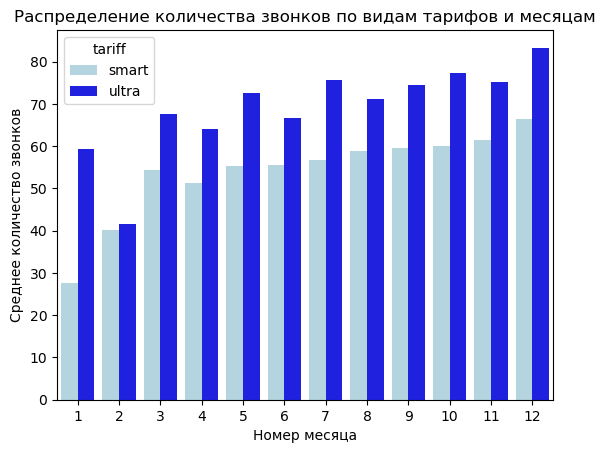

In [38]:
# Распределение среднего количества звонков по видам тарифов и месяцам.
ax = sns.barplot(x='month',
    y='calls_mean',
    hue="tariff",
    data=stats_df,
    palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

In [39]:
# как это выглядит в таблице.
pd.crosstab([stats_df.month, stats_df.calls_mean],
    stats_df.tariff)

tariff            smart  ultra
month calls_mean              
1     27.68           1      0
      59.44           0      1
2     40.19           1      0
      41.54           0      1
3     54.32           1      0
      67.68           0      1
4     51.31           1      0
      64.09           0      1
5     55.24           1      0
      72.51           0      1
6     55.55           1      0
      66.74           0      1
7     56.73           1      0
      75.78           0      1
8     58.98           1      0
      71.29           0      1
9     59.55           1      0
      74.60           0      1
10    59.96           1      0
      77.37           0      1
11    61.50           1      0
      75.12           0      1
12    66.49           1      0
      83.32           0      1

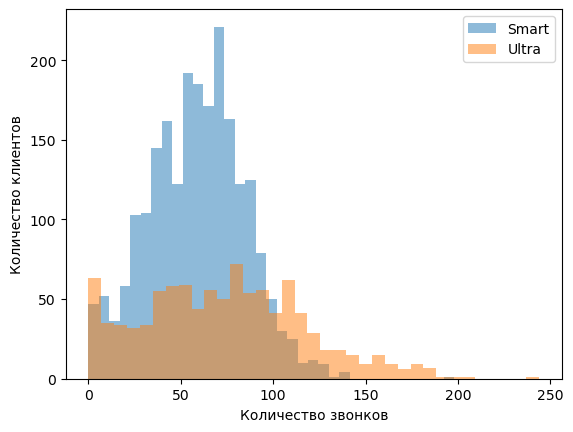

In [40]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

In [41]:
# Распределение количества звонков в общем по тарифам и месяцам.
pd.crosstab(user_behavior.month, user_behavior.tariff,
    values=user_behavior.calls,
    aggfunc='sum').round(0)

tariff    smart    ultra
month                   
1         941.0    535.0
2        2331.0    997.0
3        4183.0   2504.0
4        5747.0   3525.0
5        7789.0   4858.0
6        9110.0   5606.0
7       11402.0   6896.0
8       13860.0   7628.0
9       15482.0   8579.0
10      17629.0   9517.0
11      19435.0  10066.0
12      22406.0  11581.0

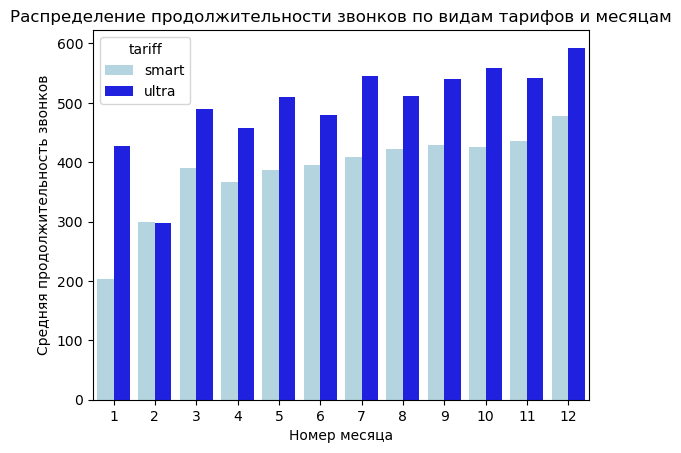

In [42]:
# Распределение средней продолжительности звонков по видам тарифов и месяцам.
ax = sns.barplot(x='month',
    y='minutes_mean',
    hue="tariff",
    data=stats_df,
    palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

In [43]:
# как это выглядит в таблице.
# Распределение средней продолжительности звонков по видам тарифов и месяцам.
pd.crosstab([stats_df.month, stats_df.minutes_mean],
    stats_df.tariff)

tariff              smart  ultra
month minutes_mean              
1     203.85            1      0
      428.11            0      1
2     297.12            0      1
      298.69            1      0
3     390.05            1      0
      489.65            0      1
4     367.13            1      0
      458.02            0      1
5     387.36            1      0
      510.33            0      1
6     395.64            1      0
      479.70            0      1
7     408.35            1      0
      545.79            0      1
8     421.47            1      0
      510.78            0      1
9     428.61            1      0
      539.44            0      1
10    426.14            1      0
      558.08            0      1
11    435.27            1      0
      541.38            0      1
12    478.56            1      0
      592.81            0      1

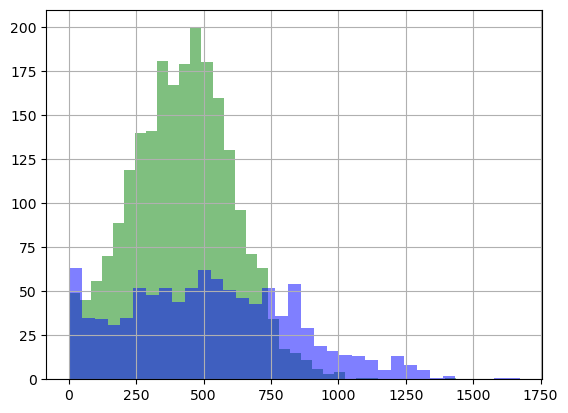

In [44]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

In [45]:
# Распределение потраченных минут в общем по тарифам и месяцам.
pd.crosstab(user_behavior.month, user_behavior.tariff,
    values=user_behavior.minutes,
    aggfunc='sum').round(0)

tariff     smart    ultra
month                    
1         6931.0   3853.0
2        17324.0   7131.0
3        30034.0  18117.0
4        41119.0  25191.0
5        54618.0  34192.0
6        64885.0  40295.0
7        82079.0  49667.0
8        99045.0  54653.0
9       111439.0  62036.0
10      125284.0  68644.0
11      137544.0  72545.0
12      161275.0  82400.0

Из графиков и таблиц выше мы видем:

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart.

В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров.

Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года.

Пользователи тарифа Ultra не проявляют подобной линейной стабильности.

Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

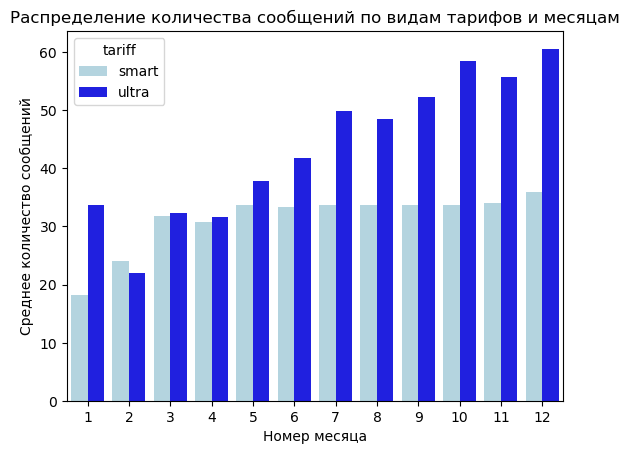

In [46]:
# Распределение среднего количества сообщений по видам тарифов и месяцам.
ax = sns.barplot(x='month',
    y='messages_mean',
    hue="tariff",
    data=stats_df,
    palette=['lightblue', 'blue'])

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

In [47]:
# Распределение среднего количества сообщений по видам тарифов и месяцам.
pd.crosstab([stats_df.month, stats_df.messages_mean],
    stats_df.tariff)

tariff               smart  ultra
month messages_mean              
1     18.24              1      0
      33.78              0      1
2     21.96              0      1
      24.09              1      0
3     31.86              1      0
      32.30              0      1
4     30.74              1      0
      31.56              0      1
5     33.77              1      0
      37.85              0      1
6     33.40              1      0
      41.73              0      1
7     33.75              1      0
      49.85              0      1
8     33.64              1      0
      48.44              0      1
9     33.64              1      0
      52.29              0      1
10    33.77              1      0
      58.43              0      1
11    34.08              1      0
      55.79              0      1
12    35.99              1      0
      60.61              0      1

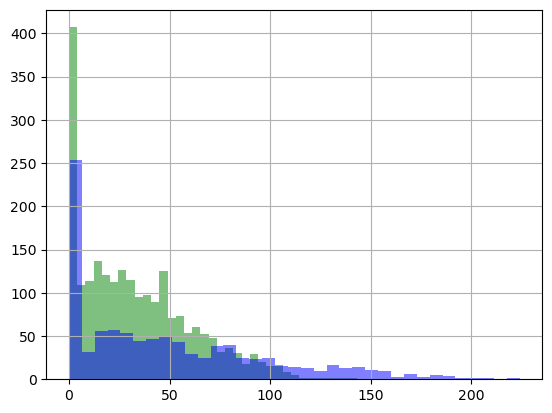

In [48]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

In [49]:
# Посмотрим распределение.
# Распределение количества отправленных смс по тарифам и месяцам в общем.
pd.crosstab(user_behavior.month, user_behavior.tariff,
    values=user_behavior.messages,
    aggfunc='sum').round(0)

tariff    smart   ultra
month                  
1         620.0   304.0
2        1397.0   527.0
3        2453.0  1195.0
4        3443.0  1736.0
5        4762.0  2536.0
6        5478.0  3505.0
7        6784.0  4536.0
8        7905.0  5183.0
9        8746.0  6013.0
10       9927.0  7187.0
11      10768.0  7476.0
12      12130.0  8425.0

Из графиков и таблиц выше мы видем:

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений, чем пользователи тарифа Smart.

Количество сообщений в течение года на обоих тарифах растет.

Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

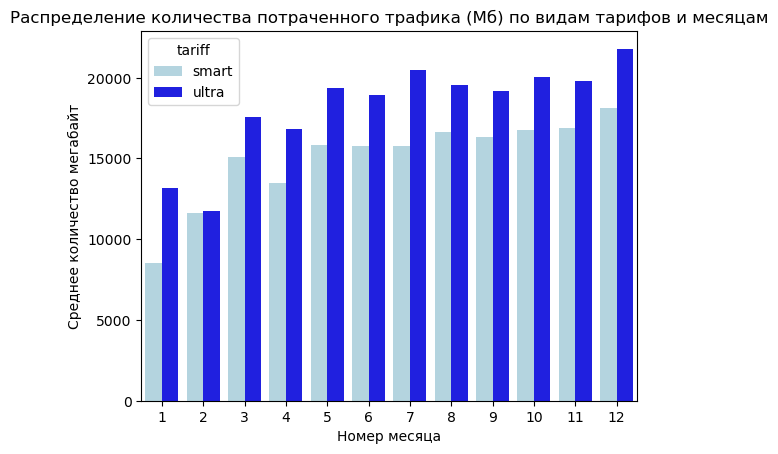

In [50]:
# Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra.
ax = sns.barplot(x='month',
    y='sessions_mean',
    hue="tariff",
    data=stats_df,
    palette=['lightblue', 'blue'])

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

In [51]:
# Распределение среднего количества МБ потраченных пользователями тарифов.
pd.crosstab([stats_df.month, stats_df.sessions_mean],
    stats_df.tariff)

tariff               smart  ultra
month sessions_mean              
1     8513.72            1      0
      13140.68           0      1
2     11597.05           1      0
      11775.94           0      1
3     15104.16           1      0
      17535.55           0      1
4     13462.18           1      0
      16828.13           0      1
5     15805.18           1      0
      19363.15           0      1
6     15794.65           1      0
      18924.94           0      1
7     15743.15           1      0
      20495.67           0      1
8     16610.72           1      0
      19576.05           0      1
9     16303.58           1      0
      19204.28           0      1
10    16757.12           1      0
      20045.34           0      1
11    16895.70           1      0
      19786.81           0      1
12    18113.66           1      0
      21793.17           0      1

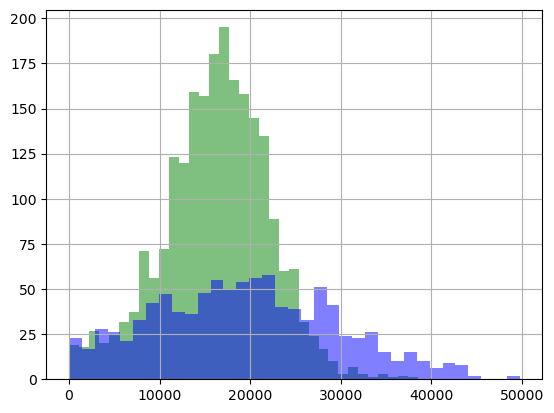

In [52]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

In [53]:
# Посмотрим на распределение
# Распределение потраченных МБ в общем по тарифам и месяцам.
pd.crosstab(user_behavior.month, user_behavior.tariff,
    values=user_behavior.mb_used,
    aggfunc='sum').round(0)

tariff      smart      ultra
month                       
1        289466.0   118266.0
2        672629.0   282622.0
3       1163020.0   648815.0
4       1507764.0   925547.0
5       2228531.0  1297331.0
6       2590322.0  1589695.0
7       3164373.0  1865106.0
8       3903519.0  2094638.0
9       4238930.0  2208492.0
10      4926594.0  2465576.0
11      5339040.0  2651433.0
12      6104304.0  3029251.0

Из графиков и таблицы выше мы видем:

Меньше всего пользователи использовали интернет в январе, феврале и апреле.

Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

## Проверка гипотез

Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт";

H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт".

Зададим alpha = 0.05.

In [54]:
smart_data = user_behavior.query('tariff == "smart"')
ultra_data = user_behavior.query('tariff == "ultra"')

# alpha = зададим значение уровня значимости
alpha = 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    ultra_data['total_cost'], 
    smart_data['total_cost'], 
    equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы

H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы

Зададим alpha = 0.05

In [55]:
msk_data = user_behavior.query('city == "Москва"')
no_msk_data = user_behavior.query('city != "Москва"')

# alpha = зададим значение уровня значимости
alpha = 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    msk_data['total_cost'], 
    no_msk_data['total_cost'], 
    equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


## Общий вывод
Для анализа были даны 5 таблиц с данными о - клиентах, звонках, смс сообщениях, потраченном интернет трафике - оператора.

В представленных данных после анализа обнаружились пропуски, которые были заменены.

Столбцы -- reg_date, churn_date- таблицы users; call_date из таблицы calls, message_date из таблицы messages; session_date из таблицы sessions были приведены к типу datetime.

Столбец duration датафрейма calls был округлен до целых значений.

Удалили столбец Unnamed: 0 из датафрейма sessions, т.к. его появление явилось следствием неправильной выгрузки данных

В датафреймах -- calls, messages, sessions, создали столбцы month с номером месяца.

Далее все датафреймы объединили в один.

При анализе потребленных услуг мы выяснили, что:

* Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart.
    * В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров.
* В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений, чем пользователи тарифа Smart.
    * Количество сообщений в течение года на обоих тарифах растет.
* Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года, чего нельзя сказать о пользователях тарифа smart.

Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели:

Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

Меньше всего пользователи использовали интернет в январе, феврале и апреле.

Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

Нами были выдвинуты и проверены две гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    * h_0 выручка пользователей смарт = выручке пользователей ультра;
    * h_a выручка пользователей смарт не равна выручке пользователей ультра.
    
Действительно, выручка оператора от пользователей разных тарифов разная. p-value=4.2606313931076085e-250- Отвергаем нулевую гипотезу.

Вторая гипотеза звучала так: пользователи из Москвы приносят больше выручки, чем пользователи из других городов.

Значение p-value=0.5257376663729298.

Пользователи из других городов не приносят больше выручки чем пользователи из Москвы.